In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
data = pd.read_csv(r"C:/Users/DELL/Downloads/assignment/clustering assignment/crime_data.csv")

In [3]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Data pre-processing / exploration

In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
#Dropping column unnamed as it will contribute much for clustering

data.drop(['Unnamed: 0'],axis=1, inplace=True)

# EDA

<Axes: >

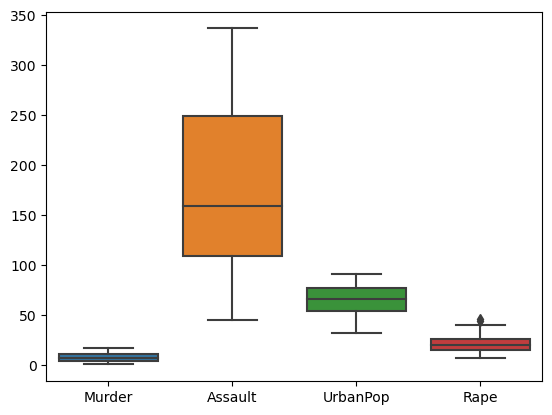

In [10]:
sns.boxplot(data=data)

<Axes: >

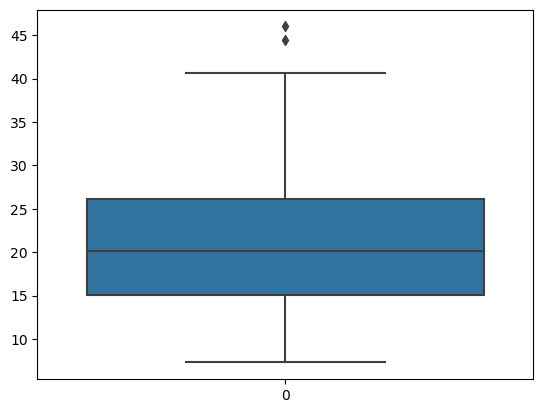

In [11]:
sns.boxplot(data.Rape)

In [12]:
#detecting outliers

q1,q3 = np.percentile(data['Rape'],[25,75])
print(q1,q3)

15.075 26.175


In [13]:
iqr = q3-q1
print('IQR :', iqr)

IQR : 11.100000000000001


In [14]:
lower_limit = q1-(1.5*iqr)
upper_limit = q3+(1.5*iqr)

print('Upper Limit:', upper_limit, "Lower_limit:", lower_limit)

Upper Limit: 42.825 Lower_limit: -1.5750000000000028


In [15]:
data[data['Rape']>42.825]

,Murder,Assault,UrbanPop,Rape
1,10.0,263,48,44.5
27,12.2,252,81,46.0


In [16]:
# Checking correlation
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [17]:
df_std = StandardScaler().fit_transform(data)

df_std = pd.DataFrame(df_std, columns=data.columns)

# K-Means

In [18]:
error = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=13)
    kmeans.fit(df_std)
    error.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [19]:
error

[200.0,
 104.96163315756871,
 79.95548163171664,
 57.55425863091104,
 49.969202844527935,
 44.541884760296455,
 39.44879101757742,
 36.53227905990805,
 32.28374914882532,
 29.294746515972374]

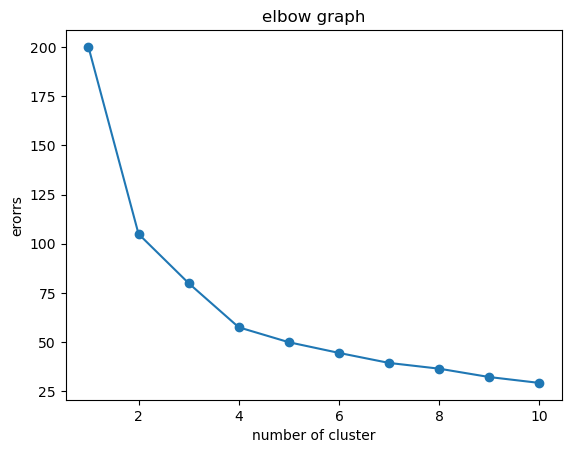

In [20]:
# elbow method

plt.plot(range(1,11), error, marker='o')
plt.title('elbow graph')
plt.xlabel('number of cluster')
plt.ylabel('erorrs')
plt.show()

In [21]:
#makeing cluster with k=4

kmeans4 = KMeans(n_clusters=4, random_state=42).fit(df_std)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
kmeans4.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [23]:
kmeans4.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [24]:
data['cluster4_id']= kmeans4.labels_

In [25]:
data

,Murder,Assault,UrbanPop,Rape,cluster4_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [26]:
data.groupby('cluster4_id').agg(['mean']).reset_index()

,cluster4_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


# Hierarchical Clustering

In [27]:
crime= data

In [32]:
crime_norm = MinMaxScaler().fit_transform(crime)

In [33]:
crime_norm = pd.DataFrame(crime_norm, columns= crime.columns)

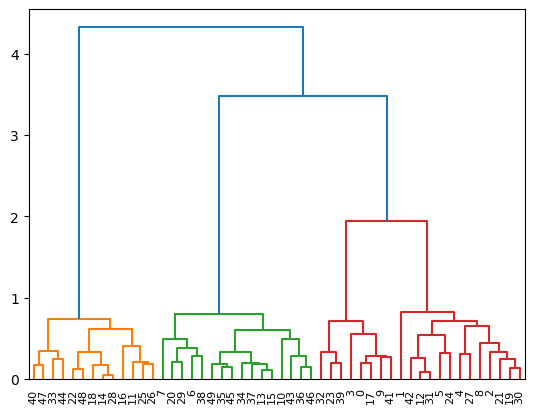

In [34]:
den_crime = sch.dendrogram(sch.linkage(crime_norm, method='ward'))

In [35]:
hc_crime = AgglomerativeClustering(n_clusters=4, affinity= 'euclidean', linkage='ward')

In [36]:
y_crime = hc_crime.fit_predict(crime_norm)
y_crime

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [37]:
crime['cluster_id'] = y_crime

In [38]:
crime['cluster_id'].value_counts()

2    16
0    13
1    13
3     8
Name: cluster_id, dtype: int64

In [39]:
crime.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape,cluster4_id
,,mean,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308,2.0
1,1,3.600000,78.538462,52.076923,12.176923,3.0
2,2,5.656250,138.875000,73.875000,18.781250,0.0
3,3,13.937500,243.625000,53.750000,21.412500,1.0


# DBSCAN

In [40]:
df = pd.read_csv("C:/Users/DELL/Downloads/assignment/clustering assignment/crime_data.csv")

In [41]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [42]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [43]:
df_std = StandardScaler().fit_transform(df)
df_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [44]:
df_std = pd.DataFrame(df_std)

In [45]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit_predict(df_std)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [46]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [47]:
df['Cluster'] = dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [48]:
df.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


In [49]:
df['Cluster'].value_counts()

 1    28
-1    18
 0     4
Name: Cluster, dtype: int64

In [50]:
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
